<a href="https://colab.research.google.com/github/mudiojas/SDN-Data-Processing/blob/main/BUET_DDoS2020_DDoS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here we will try and analyse the BUET-DDoS 2020 Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Pondicherry Trip/test_NoNULL.csv')

<ipython-input-2-d6ce0a6c9e37>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Pondicherry Trip/test_NoNULL.csv')


In [3]:
data.head()

,timestamp,src_ip,dst_ip,protocol,length,src_port,dst_port,req_for,dns_query_response,tx_id,req_reply,ttl,label,Label_Test
0,5.098458,137.3.161.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
1,5.098468,84.144.19.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
2,5.098485,56.99.241.128,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
3,5.098495,222.211.220.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
4,5.098505,98.128.189.128,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1


In [4]:
data.shape

(112939, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112939 entries, 0 to 112938
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           112939 non-null  float64
 1   src_ip              112939 non-null  object 
 2   dst_ip              112939 non-null  object 
 3   protocol            112939 non-null  object 
 4   length              112939 non-null  int64  
 5   src_port            112939 non-null  int64  
 6   dst_port            112939 non-null  int64  
 7   req_for             112939 non-null  object 
 8   dns_query_response  112939 non-null  object 
 9   tx_id               112939 non-null  object 
 10  req_reply           112939 non-null  object 
 11  ttl                 112939 non-null  int64  
 12  label               112939 non-null  object 
 13  Label_Test          112939 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 12.1+ MB


### we have to train the model depending upon the values of the Label column, they are as follows-

In [7]:
data.Label_Test.unique()

array([1, 2])

### Checking how many entries there are per label-

In [8]:
data.Label_Test.value_counts()
#data.label.value_counts()

1    98197
2    14742
Name: Label_Test, dtype: int64

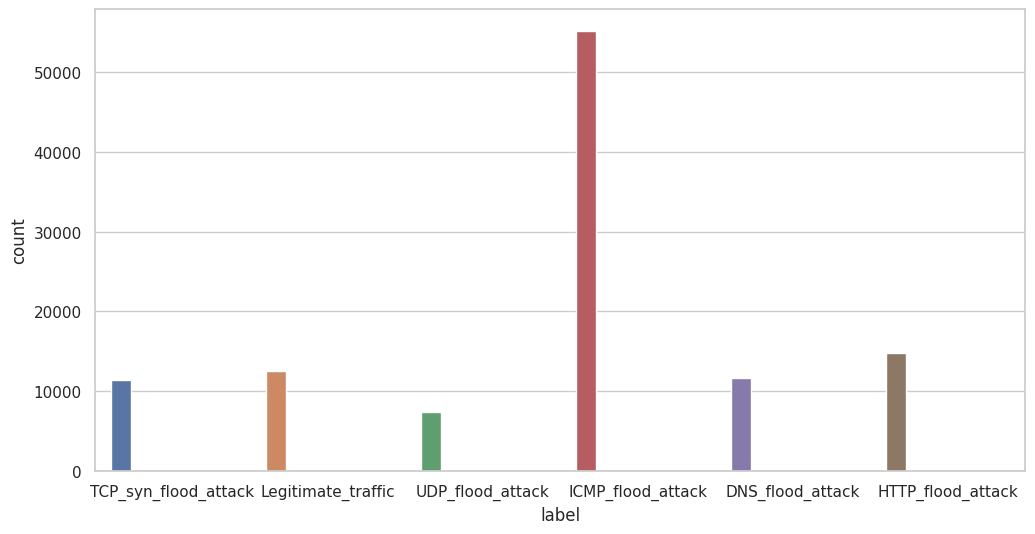

In [9]:
plt.figure(figsize=(12, 6))

# Set the plotting style
sns.set(style="whitegrid")

label_dict = dict(data.label.value_counts())
ax = sns.countplot(x=data.label)
ax.set_xticklabels(label_dict.keys())  # Set the x-axis tick labels

# Adjust the width of the bars
total_width = len(label_dict)
width = 0.8 / total_width
for patch in ax.patches:
    patch.set_width(width)

plt.show()

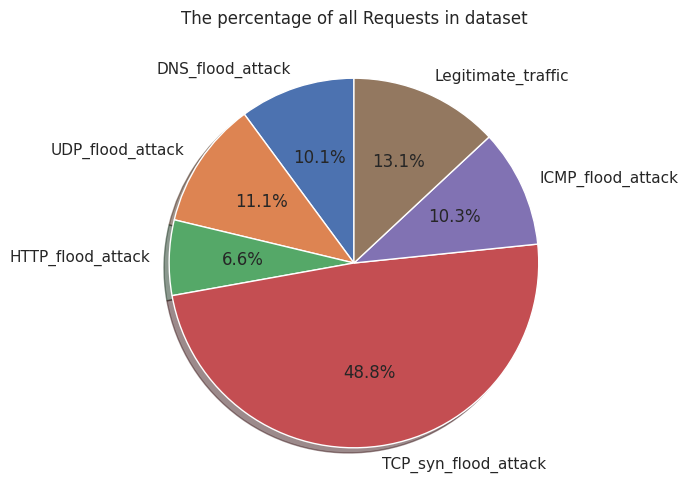

In [10]:
labels = ['DNS_flood_attack', 'UDP_flood_attack', 'HTTP_flood_attack', 'TCP_syn_flood_attack', 'ICMP_flood_attack', 'Legitimate_traffic']
sizes = [dict(data.label.value_counts())[label] for label in labels]

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The percentage of all Requests in dataset')
plt.show()


In [11]:
data.describe()

,timestamp,length,src_port,dst_port,ttl,Label_Test
count,112939.000000,112939.000000,112939.000000,112939.000000,112939.000000,112939.000000
mean,3865.271665,229.402332,12831.267932,8571.681235,6.605761,1.130531
std,11166.874243,377.281907,19834.775570,17882.514748,19.477001,0.336888
min,5.098458,42.000000,0.000000,0.000000,0.000000,1.000000
25%,23.626121,58.000000,0.000000,0.000000,0.000000,1.000000
50%,127.177163,70.000000,80.000000,80.000000,0.000000,1.000000
75%,129.961870,174.000000,22184.500000,2235.500000,0.000000,1.000000
max,86384.497510,1454.000000,65535.000000,65535.000000,128.000000,2.000000


### How many columns have null values represented as SUM-

In [12]:
data.isnull().sum()

timestamp             0
src_ip                0
dst_ip                0
protocol              0
length                0
src_port              0
dst_port              0
req_for               0
dns_query_response    0
tx_id                 0
req_reply             0
ttl                   0
label                 0
Label_Test            0
dtype: int64

In [13]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['timestamp', 'length', 'src_port', 'dst_port', 'ttl', 'Label_Test'], dtype='object') 

Object Columns: 
Index(['src_ip', 'dst_ip', 'protocol', 'req_for', 'dns_query_response',
       'tx_id', 'req_reply', 'label'],
      dtype='object') 

Number of Numeric Features:  6
Number of Object Features:  8


In [14]:
object_df.head()

,src_ip,dst_ip,protocol,req_for,dns_query_response,tx_id,req_reply,label
0,137.3.161.0,172.16.0.248,DNS,test_query,Standard_query,0x4242,0,DNS_flood_attack
1,84.144.19.0,172.16.0.248,DNS,test_query,Standard_query,0x4242,0,DNS_flood_attack
2,56.99.241.128,172.16.0.248,DNS,test_query,Standard_query,0x4242,0,DNS_flood_attack
3,222.211.220.0,172.16.0.248,DNS,test_query,Standard_query,0x4242,0,DNS_flood_attack
4,98.128.189.128,172.16.0.248,DNS,test_query,Standard_query,0x4242,0,DNS_flood_attack


### Visualization of all source IPs. Would have been useful if we had less than 5k unique Src_IPs

In [ ]:
#figure(figsize=(12, 7), dpi=80)
#plt.barh(list(dict(data.src_ip.value_counts()).keys()), dict(data.src_ip.value_counts()).values(), color='lawngreen')

#for idx, val in enumerate(dict(data.src_ip.value_counts()).values()):
#    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)
#
#plt.xlabel('Number of Requests')
#plt.ylabel('IP addres of sender')
#plt.title('Number of all reqests')

Text(0.5, 1.0, 'The number of requests from different protocols')

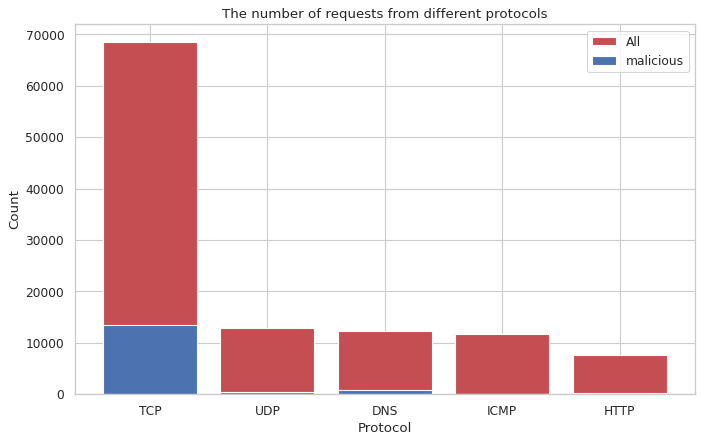

In [15]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.protocol.value_counts()).keys()), dict(data.protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 'Legitimate_traffic'].protocol.value_counts()).keys()), dict(data[data.label == 'Legitimate_traffic'].protocol.value_counts()).values(), color='b')

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [16]:
df = data.copy()

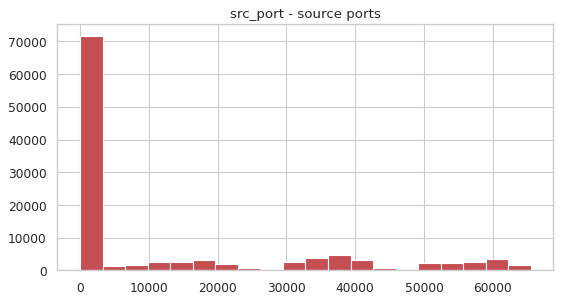

In [18]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.src_port, bins=20, color='r')
plt.title('src_port - source ports')
plt.show()

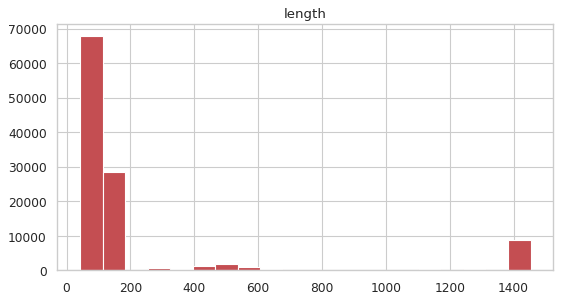

In [19]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.length, bins=20, color='r')
plt.title('length')
plt.show()

## Trying out ML/DL Models

In [20]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%",
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})

            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))


    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()


        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)

        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)

        dt_search.fit(self.X_train, self.y_train)

        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']

        dtree = DecisionTreeClassifier(criterion=criterion,
                                       max_depth=max_depth,
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini',
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)

        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

In [22]:
df = data.copy()
df = df.dropna()
df.head()

,timestamp,src_ip,dst_ip,protocol,length,src_port,dst_port,req_for,dns_query_response,tx_id,req_reply,ttl,label,Label_Test
0,5.098458,137.3.161.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
1,5.098468,84.144.19.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
2,5.098485,56.99.241.128,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
3,5.098495,222.211.220.0,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1
4,5.098505,98.128.189.128,172.16.0.248,DNS,70,0,0,test_query,Standard_query,0x4242,0,0,DNS_flood_attack,1


In [23]:
X = df.drop(['src_ip','dst_ip','Label_Test'], axis=1)
y = df.label

In [24]:
X = pd.get_dummies(X)

In [25]:
M = Model(X)

In [26]:
## Logistic Regression(Without FS)
M.LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 100.00% 

########################################################################
Best solver is :  newton-cg
########################################################################
                      precision    recall  f1-score   support

    DNS_flood_attack       1.00      1.00      1.00      3405
   HTTP_flood_attack       1.00      1.00      1.00      2225
   ICMP_flood_attack       1.00      1.00      1.00      3394
  Legitimate_traffic       1.00      1.00      1.00      4358
TCP_syn_flood_attack       1.00      1.00      1.00     16732
    UDP_flood_attack       1.00      1.00      1.00      3768

            accuracy                           1.00     33882
           macro avg       1.00      1.00      1.00     33882
        weighted avg       1.00      1.00      1.00     33882
 

########################################################################
--- 595.931431055069 seconds --- time for LogisticRegression


In [47]:
M.SupportVectorMachine()

ValueError: ignored

In [48]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits


ValueError: ignored

In [49]:
M.KNearetsNeighbor()

ValueError: ignored